### Library import

In [2]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Built in datasets

In [24]:
datasets.load_boston

<function sklearn.datasets._base.load_boston(*, return_X_y=False)>

In [25]:
datasets.fetch_california_housing

<function sklearn.datasets._california_housing.fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)>

In [26]:
datasets.make_regression

<function sklearn.datasets._samples_generator.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)>

### Regression

In [27]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10) #, noise=2.5)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [28]:
model = linear_model.LinearRegression()

In [29]:
model.fit(X_train, y_train) #특징행렬, 반응변수벡터

LinearRegression()

In [30]:
def sse(resid):
    return sum(resid**2)

In [31]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.0498792015405402e-24

In [32]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test #train셋의 경우 과적합으로 인해 잔차0, 하지만 낯선 데이터에는 잘 예측하지 못함

254433.79906412945

In [33]:
model.score(X_train, y_train)

1.0

In [34]:
model.score(X_test, y_test)

0.15771825648025317

In [35]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

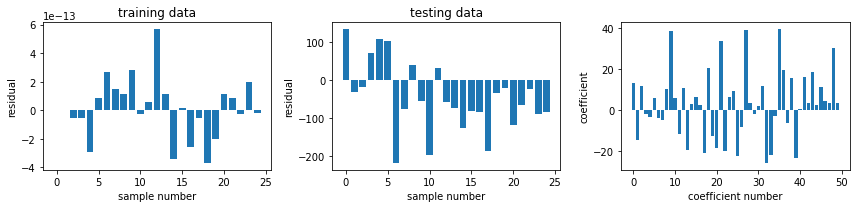

In [36]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

위의 경우는 표본이 너무 적기 때문에 발생한 과적합 <br>
정규화 회귀(Regularized regression)은 과적합을 없애는 방법으로 적합화를 진행하는 것 <br>
아래는 Ridge 회귀로 alpha는 정규화 강도를 경정하는 매개변수

In [37]:
model = linear_model.Ridge() #alpha=2.5)

In [38]:
model.fit(X_train, y_train)

Ridge()

In [39]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

376.56456769862325

In [40]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

253855.57906340196

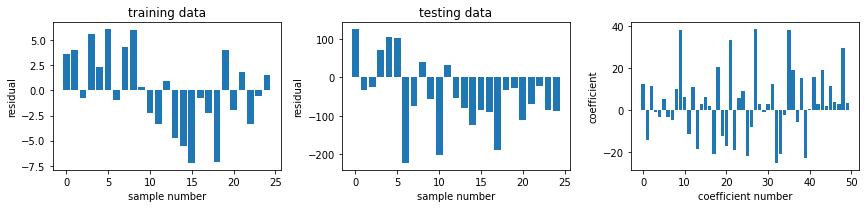

In [41]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

train셋의 경우 0에 가깝지 않지만 test셋은 약간의 감소가 있음 <br>
아래는 Lasso 클래스를 이용한 L1-정규화 라소회귀

In [42]:
model = linear_model.Lasso(alpha=1.0)

In [43]:
model.fit(X_train, y_train)

Lasso()

In [44]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

542.6640267749727

In [45]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

12426.6756452358

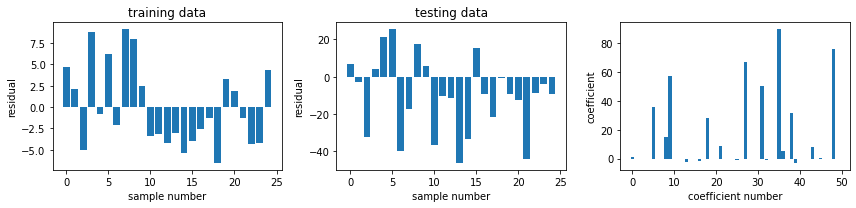

In [46]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

train셋의 경우 일반회귀보다 SSE가 증가했지만 train의 경우 현저히 감소 <br>
라소 회귀로 생성된 계수 벡터는 대부분 0을 가짐 -> 처음 우리가 데이터셋 생성할 때 50개의 특징 중 10개만 정보성으로 지정했기 때문에 현재 데이터에 사용하기 적합함

In [47]:
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

In [48]:
for n, alpha in enumerate(alphas): #alpha값을 바꿔가며 라소수행
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

C:\Users\82109\.conda\envs\summer\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+01, tolerance: 7.526e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\82109\.conda\envs\summer\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.533e+01, tolerance: 7.526e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\82109\.conda\envs\summer\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

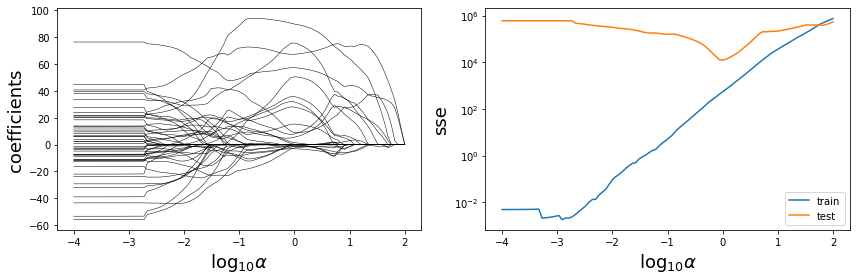

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()

RigeCV, RassoCV를 사용하면 alpha에 대한 정규화 회귀 테스트를 자동으로 수행하여 최적의 alpha값을 검색함<br>
내장된 교차 검증 덕에 train과 test셋을 나눌필요 없음

In [56]:
model = linear_model.LassoCV()

In [57]:
model.fit(X_all, y_all)

LassoCV()

In [58]:
model.alpha_

0.0785366978318188

In [59]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

4.325796459327997

In [60]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1.8506682299795587

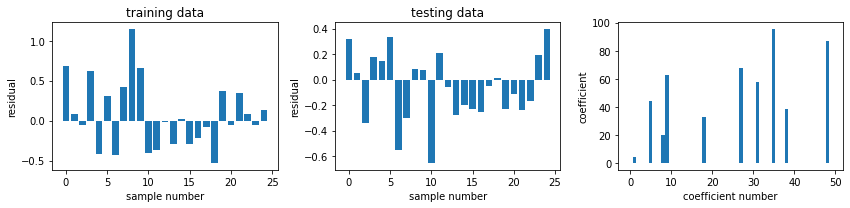

In [62]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [63]:
# 라소와 리지의 L1, L2 정규화를 결합한 정규화 회귀
model = linear_model.ElasticNetCV()

In [64]:
model.fit(X_all, y_all)

ElasticNetCV()

In [65]:
model.alpha_

0.1570733956636376

In [66]:
model.l1_ratio

0.5

In [67]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

8040.084100276036

In [68]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

5356.505670329205

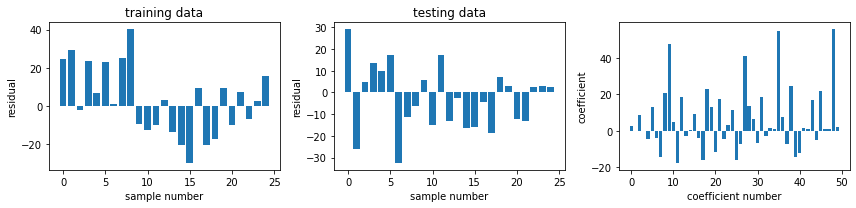

In [69]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

### Classification <BR>
훈련 데이터셋으로 분류 모델을 훈련시키고 그 성능을 TEST로 시험

In [70]:
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [71]:
iris.target_names #목표 클래스

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [72]:
iris.feature_names #특징

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [75]:
iris.data.shape

(150, 4)

In [76]:
iris.target.shape

(150,)

In [77]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7) #표본의 70%를 train 나머지는 test와 validation

In [79]:
classifier = linear_model.LogisticRegression()

분류기를 훈련시키고 분류 작업을 수행하는 첫 번째 단계는 분류기 인스턴스를 만드는 것

In [80]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_test_pred = classifier.predict(X_test)

In [84]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [87]:
metrics.confusion_matrix(y_test, y_test_pred) #C_ij는 j로 분류된 범주 i의 표본 개수, 원래 3부류인데 2로 잘못 분류된것 1개있음

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 18]], dtype=int64)

In [90]:
np.bincount(y_test) #각 부류에 몇개의 원소가 있는지 알 수 있음

array([12, 14, 19], dtype=int64)

In [91]:
classifier = tree.DecisionTreeClassifier() #로지스틱 회귀 대신 의사 결정 트리 사용
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 19]], dtype=int64)

In [92]:
# train 셋의 크기를 변화시키면서 분류기 간의 성능 비교
train_size_vec = np.linspace(0.1, 0.9, 30)

In [93]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

In [95]:
# train셋 크기의 비율과 혼돈 행렬의 대각을 저장할 배열 생성
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [96]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

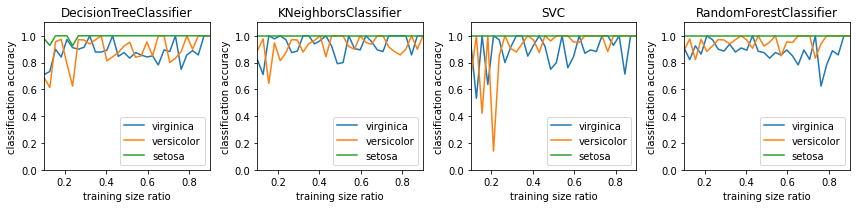

In [97]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

fig.tight_layout()

### Clustering

In [98]:
X, y = iris.data, iris.target #특징과 목표 데이터

In [101]:
n_clusters = 3 #K-평균 클러스터링은 출력에서 원하는 크러스터 개수를 명시해줘야함
clustering = cluster.KMeans(n_clusters=n_clusters)

In [102]:
clustering.fit(X)

KMeans(n_clusters=3)

In [103]:
y_pred = clustering.predict(X) #클러스터링 결과 얻음

In [104]:
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [106]:
y[::8] #얻어진 클러스터링을 표본의 지도 분류와 비교

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [111]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1
y_pred[::8]
#클러스티렁은 지도 분류에서 목표벡터에서 사용한것과 다른 정수값을 그룹에 할당
# 혼동 행렬로 비교하려면 각 요소 이름을 동일한 그룹에 동일한 정숫값이 사용되도록 해야하니까 이름 바꿔줌

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [113]:
metrics.confusion_matrix(y, y_pred) 
#지도 분류와 비지도 분류가 얼마나 일치하는지 요약
# 첫번째 그룹에서는 모든 표본을 정확히 식별, 두,세번째 그룹은 완전히 분리X

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

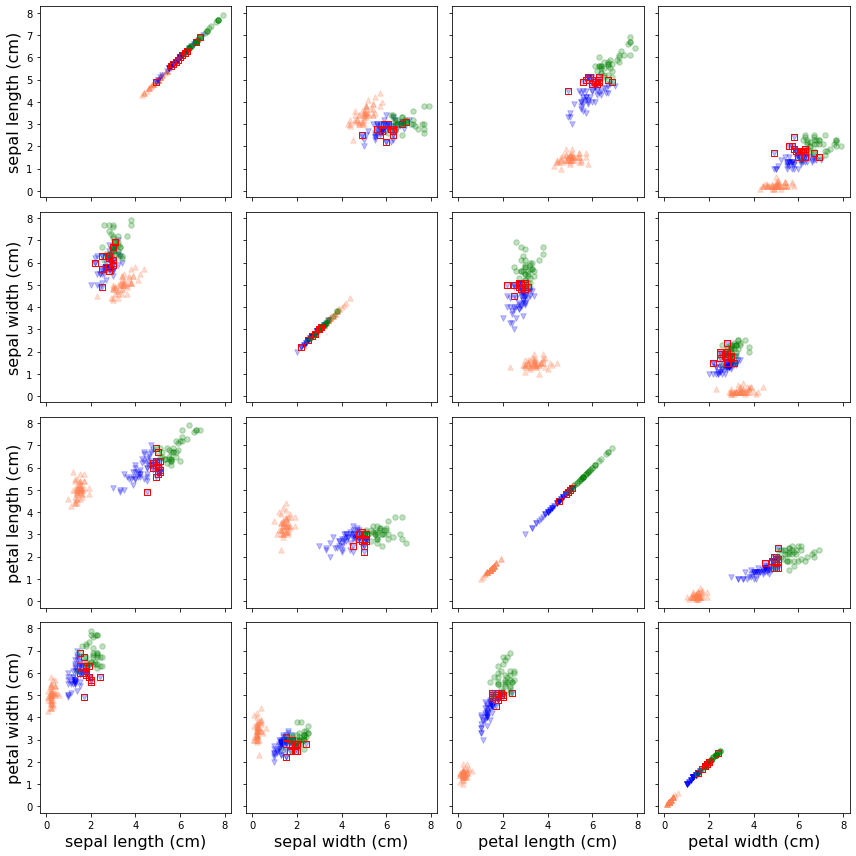

In [114]:
N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()

# 클러스터링이 지도 분류에 일치ㅏ지 않으면 빨간색 사각형 그림